In [1]:
# K-Means 

In [2]:
import pandas as pd
import numpy as np

In [3]:
X_points = np.random.randint(1,20,10)
y_points = np.random.randint(10,30,10)

In [4]:
X_points,y_points

(array([17,  8,  3, 13, 11, 15, 12,  4,  8,  9], dtype=int32),
 array([16, 27, 19, 20, 28, 25, 17, 27, 17, 20], dtype=int32))

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

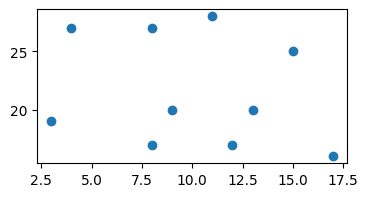

In [7]:
plt.figure(figsize=(4,2))
plt.scatter(X_points,y_points)
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
data = list(zip(X_points,y_points))

In [17]:
inertia = []

In [20]:
for i in range(1,len(X_points)+1):
    km = KMeans(n_clusters = i)
    km.fit(data)
    inertia.append(km.inertia_)

In [21]:
inertia

[378.4,
 199.91666666666669,
 117.75,
 94.08333333333333,
 53.0,
 39.33333333333333,
 15.0,
 10.0,
 5.0,
 0.0]

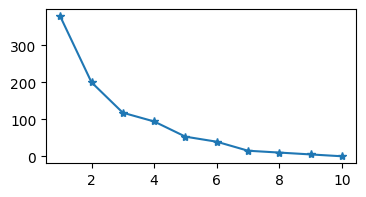

In [25]:
plt.figure(figsize=(4,2))
plt.plot(range(1,len(X_points)+1),inertia,marker='*')
plt.show()

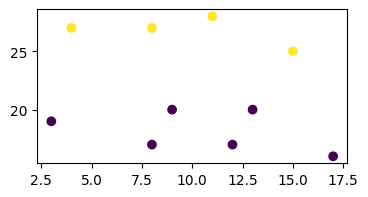

In [27]:
km =KMeans(n_clusters = 2)
km.fit(data)
plt.figure(figsize = (4,2))
plt.scatter(X_points,y_points,c = km.labels_)
plt.show()

In [29]:
df =pd.read_csv(r"C:\Users\dell\Downloads\shopping_trends.csv").ffill()
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [30]:
from sklearn.preprocessing import LabelEncoder

In [33]:
la = LabelEncoder()

In [34]:
df['Item Purchased'] = la.fit_transform(df['Item Purchased'])
df['Category'] = la.fit_transform(df['Category'])

In [35]:
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,2,1,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,23,1,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,11,1,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [36]:
len(df['Category'].unique()), len(df['Item Purchased'].unique())

(4, 25)

In [38]:
df.shape

(3900, 19)

In [40]:
pbc = df.groupby(['Category','Item Purchased']).agg({'Purchase Amount (USD)':'sum'}).reset_index()

In [41]:
pbc.head(3)

,Category,Item Purchased,Purchase Amount (USD)
0,0,0,8636
1,0,1,9635
2,0,6,8477


In [42]:
data = list(zip(pbc['Item Purchased'],pbc['Purchase Amount (USD)']))

In [46]:
inertia = []

In [47]:
for i in range(1,len(pbc['Category'])+1):
    km = KMeans(n_clusters = i)
    km.fit(data)
    inertia.append(km.inertia_)

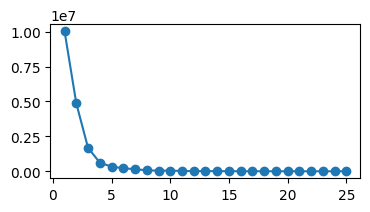

In [48]:
plt.figure(figsize = (4,2))
plt.plot(range(1, len(pbc['Category'])+1),inertia,marker ='o')
plt.show()
         

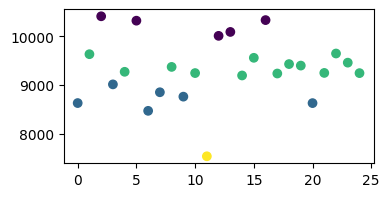

In [49]:
km = KMeans(n_clusters = 4)
km.fit(data)
plt.figure(figsize=(4,2))
plt.scatter(pbc['Item Purchased'],pbc['Purchase Amount (USD)'],c= km.labels_)
plt.show()